# Training Models Using Feature Set 1

---

**Feature Set 1** includes:

- **Soil Moisture**
- **Temperature**
- **Soil Humidity**
- **Air temperature (C)**
- **Wind speed (Km/h)**
- **Pressure (KPa)**

The dataset used for this analysis is available [here](https://www.kaggle.com/datasets/nelakurthisudheer/dataset-for-predicting-watering-the-plants).

## Importing Libraries

Import necessary libraries and do basic set up

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    classification_report, 
    roc_curve, 
    auc
)

# For handling warnings
import warnings
warnings.filterwarnings('ignore')

## Data Preparation and Feature Selection

1. **Import Dataset and Preprocess Data**: Load `soil_data.csv`, select required columns, drop nulls, and encode `Status`.
2. **Feature Selection**: Define features as `Soil Moisture`, `Temperature`, `Soil Humidity`, and `Air humidity (%)`.
3. **Select Features and Targets**: Assign features to `X` and target `Status` to `y`.


In [46]:
#import dataset, choose required columns, drop nulls and encode status
df = pd.read_csv('soil_data.csv')
required_columns = ['Soil Moisture', 'Temperature', 'Soil Humidity', 'Air temperature (C)', 'Wind speed (Km/h)', 'Pressure (KPa)', 'Status']
df_clean = df.dropna(subset=required_columns)
df_clean['Status'] = df_clean['Status'].map({'OFF': 0, 'ON': 1})

#choose features
feature_set_1 = ['Soil Moisture', 'Temperature', 'Soil Humidity', 'Air temperature (C)', 'Wind speed (Km/h)', 'Pressure (KPa)'] 

# select features and targets
X = df_clean[feature_set_1]
y = df_clean['Status']




4. **Splitting Data**: The dataset is split into 70% training and 30% evaluation sets.**Select Features and Targets**: Assign features to `X` and target `Status` to `y`.

In [47]:
#splitting data into 70% training and 30% evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Evaluation set size: {X_test.shape[0]} samples")

Training set size: 16796 samples
Evaluation set size: 7199 samples


## Logistic Regression


### Training Model

In [48]:
logreg = LogisticRegression(max_iter=1000, solver='liblinear')
logreg.fit(X_train, y_train)



LogisticRegression(max_iter=1000, solver='liblinear')

### Training Evaluations

In [49]:
# make predictions on training set
y_train_pred_logreg = logreg.predict(X_train)

# calculate training evaluation metrics
train_accuracy_logreg = accuracy_score(y_train, y_train_pred_logreg)
train_precision_logreg = precision_score(y_train, y_train_pred_logreg)
train_recall_logreg = recall_score(y_train, y_train_pred_logreg)
train_f1_logreg = f1_score(y_train, y_train_pred_logreg)

# display training metrics
print("Logistic Regression Training Performance Metrics:")
print(f"Accuracy : {train_accuracy_logreg:.4f}")
print(f"Precision: {train_precision_logreg:.4f}")
print(f"Recall   : {train_recall_logreg:.4f}")
print(f"F1-Score : {train_f1_logreg:.4f}")

Logistic Regression Training Performance Metrics:
Accuracy : 0.7053
Precision: 0.7146
Recall   : 0.7573
F1-Score : 0.7354


### Evaluation - Accuracy, Precision, Recall and F1-Score

In [50]:
# make predictions on test set, then predict on ROC Curve
y_pred_logreg = logreg.predict(X_test)
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]

# calculate evaluation metrics
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1_logreg = f1_score(y_test, y_pred_logreg)

# display metrics
print("Logistic Regression Performance Metrics:")
print(f"Accuracy : {accuracy_logreg:.4f}")
print(f"Precision: {precision_logreg:.4f}")
print(f"Recall   : {recall_logreg:.4f}")
print(f"F1-Score : {f1_logreg:.4f}")


Logistic Regression Performance Metrics:
Accuracy : 0.6941
Precision: 0.7083
Recall   : 0.7382
F1-Score : 0.7229


### Confusion Matrix

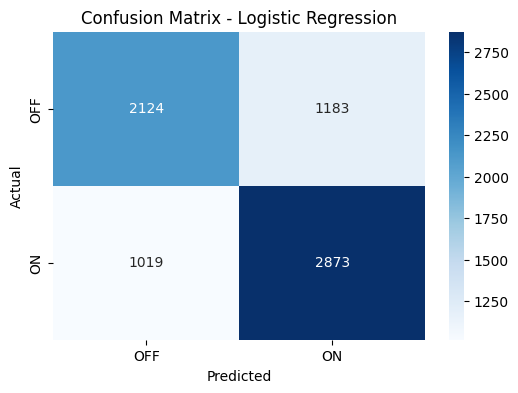

In [51]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)

# plot confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', xticklabels=['OFF', 'ON'], yticklabels=['OFF', 'ON'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


### Classification Reports

In [52]:
print("Classification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_logreg, target_names=['OFF', 'ON']))


Classification Report - Logistic Regression:
              precision    recall  f1-score   support

         OFF       0.68      0.64      0.66      3307
          ON       0.71      0.74      0.72      3892

    accuracy                           0.69      7199
   macro avg       0.69      0.69      0.69      7199
weighted avg       0.69      0.69      0.69      7199



### ROC Curve

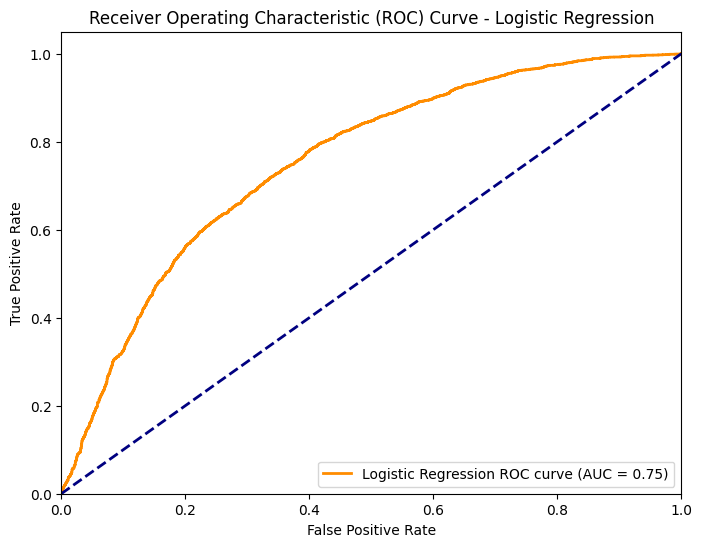

In [53]:
#compute ROC curve and AUC
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_prob_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

# plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'Logistic Regression ROC curve (AUC = {roc_auc_logreg:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()


## Random Forest

### Training Model

In [54]:
# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=100)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=100)

### Training Evaluation

In [55]:
# make predictions on training set
y_train_pred_rf = rf.predict(X_train)

# calculate training evaluation metrics
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_precision_rf = precision_score(y_train, y_train_pred_rf)
train_recall_rf = recall_score(y_train, y_train_pred_rf)
train_f1_rf = f1_score(y_train, y_train_pred_rf)

# display training metrics
print("Random Forest Training Performance Metrics:")
print(f"Accuracy : {train_accuracy_rf:.4f}")
print(f"Precision: {train_precision_rf:.4f}")
print(f"Recall   : {train_recall_rf:.4f}")
print(f"F1-Score : {train_f1_rf:.4f}")

Random Forest Training Performance Metrics:
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1-Score : 1.0000


### Evaluation - Accuracy, Precision, Recall and F1-Score

In [56]:
# predict then evaluate
y_pred_rf = rf.predict(X_test)

# calc evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

# display the metrics
print(f"Accuracy : {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall   : {recall_rf:.4f}")
print(f"F1-Score : {f1_rf:.4f}")

Accuracy : 0.7316
Precision: 0.7329
Recall   : 0.7924
F1-Score : 0.7615


### Confusion Matrix


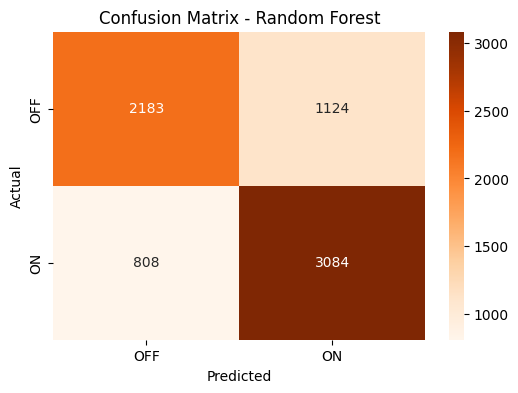

In [57]:
# gen  confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', xticklabels=['OFF', 'ON'], yticklabels=['OFF', 'ON'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### Classification Reports

In [58]:
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf, target_names=['OFF', 'ON']))

Classification Report - Random Forest:
              precision    recall  f1-score   support

         OFF       0.73      0.66      0.69      3307
          ON       0.73      0.79      0.76      3892

    accuracy                           0.73      7199
   macro avg       0.73      0.73      0.73      7199
weighted avg       0.73      0.73      0.73      7199



### ROC Curve

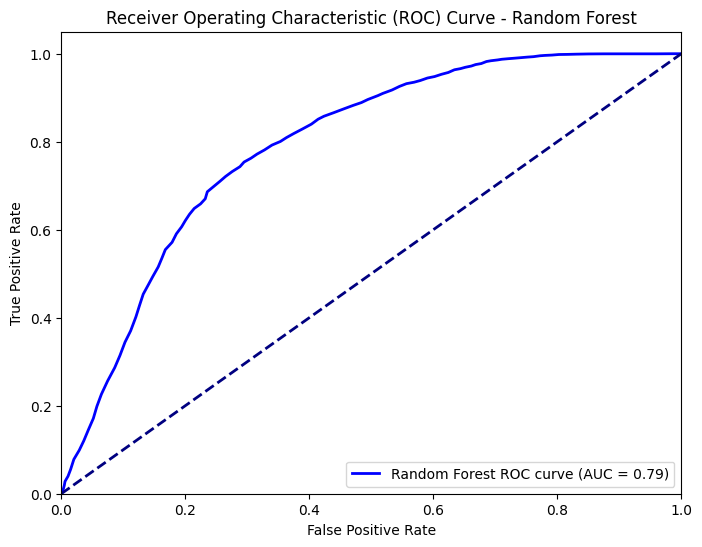

In [59]:
# Predict probabilities for ROC curve
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()

## Naive Bayes

### Training Model

In [60]:
# Initialize the Gaussian Naive Bayes model
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)


GaussianNB()

### Training Evaluation


In [61]:
# make predictions on training set
y_train_pred_gnb = gnb.predict(X_train)

# calculate training evaluation metrics
train_accuracy_gnb = accuracy_score(y_train, y_train_pred_gnb)
train_precision_gnb = precision_score(y_train, y_train_pred_gnb)
train_recall_gnb = recall_score(y_train, y_train_pred_gnb)
train_f1_gnb = f1_score(y_train, y_train_pred_gnb)

# display training metrics
print("Gaussian Naive Bayes Training Performance Metrics:")
print(f"Accuracy : {train_accuracy_gnb:.4f}")
print(f"Precision: {train_precision_gnb:.4f}")
print(f"Recall   : {train_recall_gnb:.4f}")
print(f"F1-Score : {train_f1_gnb:.4f}")

Gaussian Naive Bayes Training Performance Metrics:
Accuracy : 0.7048
Precision: 0.7146
Recall   : 0.7559
F1-Score : 0.7346


### Evaluation - Accuracy, Precision, Recall, F1-Score

In [62]:
# predict using test set
y_pred_gnb = gnb.predict(X_test)
# predict probabilities for ROC curve
y_prob_gnb = gnb.predict_proba(X_test)[:, 1]

# calculate then display evaluation metrics
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
print("Gaussian Naive Bayes Performance Metrics:")
print(f"Accuracy : {accuracy_gnb:.4f}")
print(f"Precision: {precision_gnb:.4f}")
print(f"Recall   : {recall_gnb:.4f}")
print(f"F1-Score : {f1_gnb:.4f}")


Gaussian Naive Bayes Performance Metrics:
Accuracy : 0.6945
Precision: 0.7090
Recall   : 0.7379
F1-Score : 0.7232


### Confusion Matrix

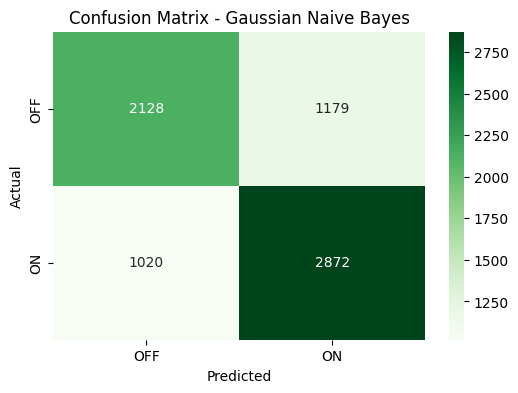

In [63]:
# Generate the confusion matrix
cm_gnb = confusion_matrix(y_test, y_pred_gnb)

# Plot the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Greens', xticklabels=['OFF', 'ON'], yticklabels=['OFF', 'ON'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix - Gaussian Naive Bayes')
plt.show()


### Classification Report

In [64]:
print("Classification Report - Gaussian Naive Bayes:")
print(classification_report(y_test, y_pred_gnb, target_names=['OFF', 'ON']))


Classification Report - Gaussian Naive Bayes:
              precision    recall  f1-score   support

         OFF       0.68      0.64      0.66      3307
          ON       0.71      0.74      0.72      3892

    accuracy                           0.69      7199
   macro avg       0.69      0.69      0.69      7199
weighted avg       0.69      0.69      0.69      7199



### ROC Curve

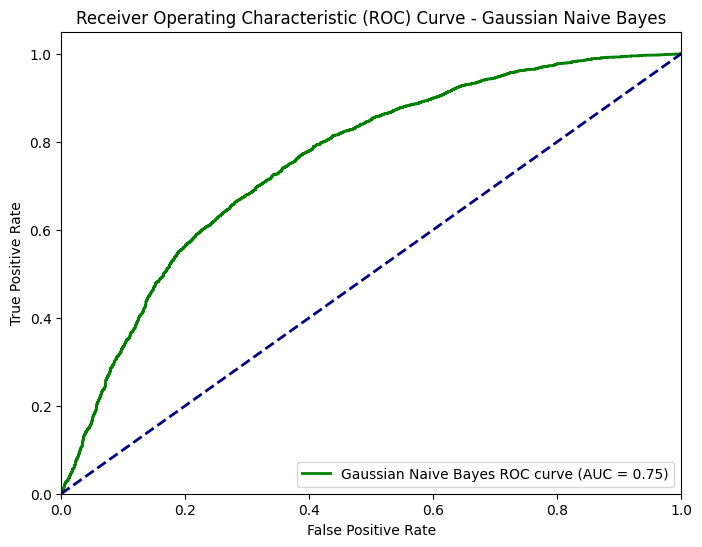

In [65]:
# Compute ROC curve and AUC
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, y_prob_gnb)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_gnb, tpr_gnb, color='green', lw=2, label=f'Gaussian Naive Bayes ROC curve (AUC = {roc_auc_gnb:.2f})')
plt.plot([0,1], [0,1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()


# All Evaluation

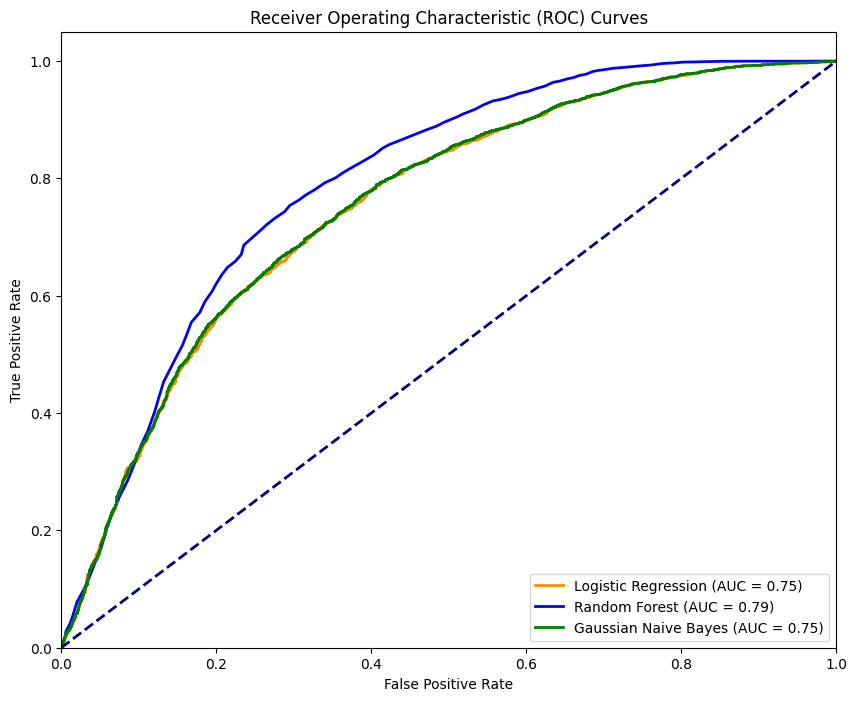

In [66]:
plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gnb, tpr_gnb, color='green', lw=2, label=f'Gaussian Naive Bayes (AUC = {roc_auc_gnb:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()
